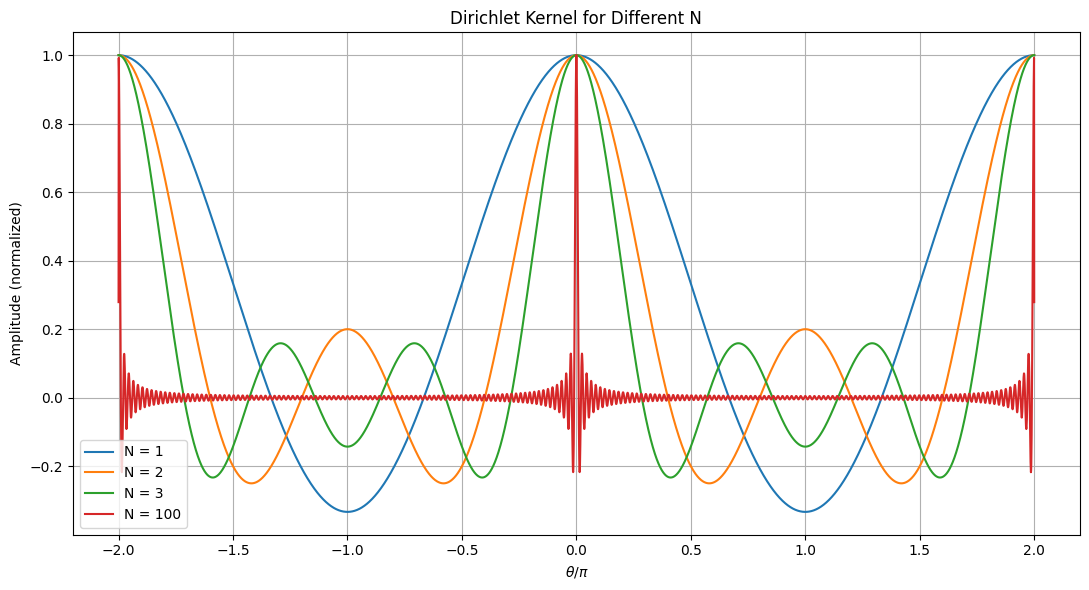

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
theta = np.linspace(-2 * np.pi, 2 * np.pi, 5000)
N_values = [1, 2, 3, 100]

plt.figure(figsize=(11, 6))

for N in N_values:
    numerator = np.sin((2 * N + 1) * theta / 2)
    denominator = np.sin(theta / 2)
    
    # Avoid division by zero
    denominator = np.where(denominator == 0, 1e-10, denominator)
    
    D_N = numerator / denominator
    D_N /= np.max(np.abs(D_N))  # Normalize for visual comparison

    plt.plot(theta / np.pi, D_N, label=f'N = {N}')

plt.title("Dirichlet Kernel for Different N")
plt.xlabel(r"$\theta / \pi$")
plt.ylabel("Amplitude (normalized)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


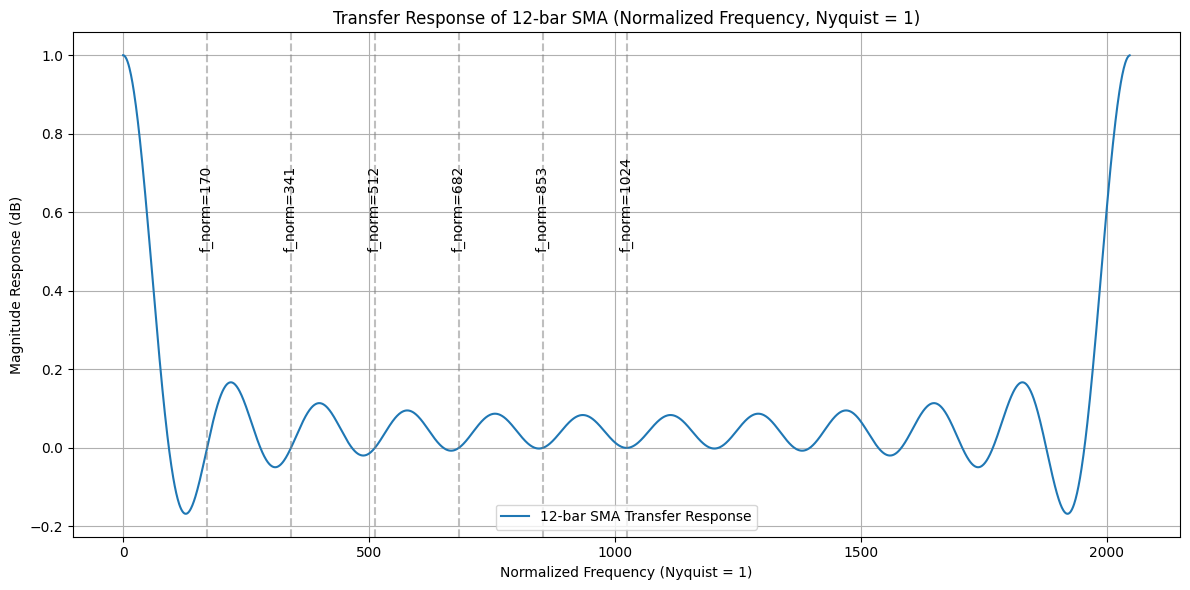

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
window_size = 12
n_points = 2048  # Increase for better frequency resolution

# Build impulse response of 12-bar SMA
impulse_response = np.ones(window_size) / window_size
impulse_padded = np.pad(impulse_response, (0, n_points - window_size), 'constant')

# Compute frequency response via FFT
freq_response = np.fft.fft(impulse_padded)
freq_magnitude = freq_response#np.abs(freq_response[:n_points // 2])  # Take positive frequencies
freq_db = freq_magnitude # 20 * np.log10(freq_magnitude + 1e-10)  # Avoid log(0)

# Frequency axis, normalized: Nyquist = 1
#freq_axis = np.linspace(0, 1, n_points)# // 2)
freq_axis = range(0, n_points)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(freq_axis, freq_db, label='12-bar SMA Transfer Response')
plt.title("Transfer Response of 12-bar SMA (Normalized Frequency, Nyquist = 1)")
plt.xlabel("Normalized Frequency (Nyquist = 1)")
plt.ylabel("Magnitude Response (dB)")
plt.grid(True)

# Annotate key periods (P=12,6,4,3,2.4,2) with vertical lines
periods = [12, 6, 4, 3, 2.4, 2]
for P in periods:
    #f_norm = 2 / P
    f_norm = 2048 /P
    plt.axvline(f_norm, color='gray', linestyle='--', alpha=0.5)
    plt.text(f_norm, 0.5, f'f_norm={int(f_norm)}', rotation=90, verticalalignment='bottom', horizontalalignment='center')

#plt.ylim(-60, 5)
plt.tight_layout()
plt.legend()
plt.show()
